In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mutual_info_score
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("data/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#reading csv
cols = ["latitude","longitude","housing_median_age","total_rooms","total_bedrooms","population",
       "households","median_income","median_house_value","ocean_proximity"]
df = df[cols]

# Data Preparation
- Select only the features from above and fill in the missing values with 0.
- Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column households from dataframe.
- Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column total_rooms from dataframe.
- Create a new column `population_per_household` by dividing the column population by the column households from dataframe.

In [5]:
df.isnull().sum()
#only total_bedrooms has 207 nulls.

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Select only the features from above and fill in the missing values with 0.
df["total_bedrooms"] = df["total_bedrooms"].fillna(0)

# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df["rooms_per_household"] = df["total_rooms"]/df["households"]

# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]

# Create a new column population_per_household by dividing the column population by the column households from dataframe.
df["population_per_household"] = df["population"]/df["households"]

### Question 1

__What is the most frequent observation (mode) for the column ocean_proximity?__

Options:

- `NEAR BAY`
- `<1H OCEAN`
- `INLAND`
- `NEAR OCEAN`

In [7]:
df["ocean_proximity"].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

__answer: `<1H OCEAN`__

### Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
- Make sure that the target value (`median_house_value`) is not in your dataframe.

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=42)

In [9]:
X_cols  = ["latitude","longitude","housing_median_age","total_rooms","total_bedrooms","population",
           "households","median_income","ocean_proximity"]
y_col   = "median_house_value"

X_train = df_train[X_cols]
X_val   = df_val[X_cols]
X_test  = df_test[X_cols]

y_train = df_train[y_col] 
y_val   = df_val[y_col]
y_test  = df_test[y_col]


### Question 2
- Create the correlation matrix for the numerical features of your train dataset.
         In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

Options:

- `total_bedrooms` and `households`
- `total_bedrooms` and `total_rooms`
- `population` and `households`
- `population_per_household` and `total_rooms`

<AxesSubplot:>

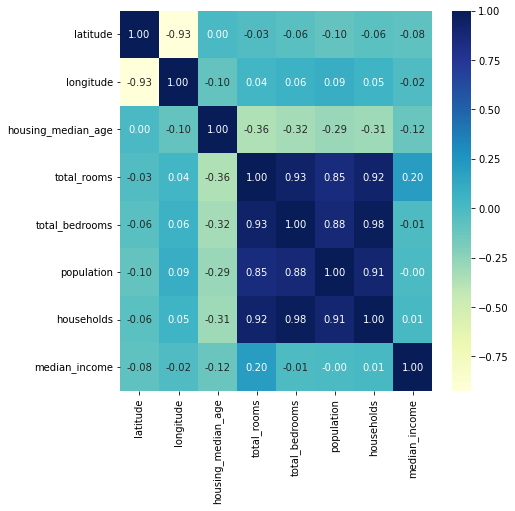

In [10]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(X_train.corr(), annot = True, fmt= '.2f', cmap="YlGnBu")

__answer: `total_bedrooms` and `households`__

## Make median_house_value binary
- We need to turn the `median_house_value` variable from numeric into binary.
- Let's create a variable `above_average` which is 1 if the `median_house_value` is above its mean value and 0 otherwise.

In [11]:
mu = y_train.mean()
above_average = np.where(y_train>mu,0,1)

### Question 3
- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

__Options:__

- __`0.263`__
- __`0.00001`__
- __`0.101`__
- __`0.15555`__

In [12]:
cat = ['ocean_proximity']

In [13]:
def calculate_mi(series):
    return mutual_info_score(series, above_average)

df_mi = df_train[cat].apply(calculate_mi)
round(df_mi,3)

ocean_proximity    0.101
dtype: float64

__answer__: __`0.101`__

### Question 4
- Now let's train a logistic regression
- Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
        To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        
        model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

__Options:__
    
- __`0.60`__
- __`0.72`__
- __`0.84`__
- __`0.95`__

In [14]:
#ONE HOT ENCODING 
X_train = pd.get_dummies(X_train)
X_val  = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)

# fit and transform y variable train, val and test

#fit
mu = y_train.mean()

#transform
oh_y_train = np.where(y_train>mu,0,1)

oh_y_val   = np.where(y_val>mu,0,1)

oh_y_test  = np.where(y_test>mu,0,1)

In [15]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,oh_y_train)
y_pred_val = model.predict(X_val)
accuracy = round(accuracy_score(oh_y_val, y_pred_val),2)
print("Accuracy: ", accuracy)

Accuracy:  0.84


__answer:__ __`Accuracy = 0.84`__

## Question 5
- Let's find the least useful feature using the feature elimination technique.


- Train a model with all these features (using the same parameters as in Q4).


- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.


- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.


- Which of following feature has the smallest difference?
    - `total_rooms`
    - `total_bedrooms`
    - `population`
    - `households`
    
__note:__ the difference doesn't have to be positive

In [16]:
def get_data(X_train, X_val, drop_col):
    XX_train = X_train.copy()
    XX_val   = X_val.copy()
    
    XX_train = XX_train.drop(drop_col,axis=1)
    XX_val   = XX_val.drop(drop_col,axis=1)
    return XX_train, XX_val

In [17]:
columns = ["total_rooms","total_bedrooms","population","households"]
for col in columns:
    XX_train, XX_val = get_data(X_train,X_val,col)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(XX_train,oh_y_train)
    y_pred_val = model.predict(XX_val)
    accuracy = round(accuracy_score(oh_y_val, y_pred_val),3)
    print("Accuracy when ", col,"is dropped:", accuracy)

Accuracy when  total_rooms is dropped: 0.836
Accuracy when  total_bedrooms is dropped: 0.837
Accuracy when  population is dropped: 0.82
Accuracy when  households is dropped: 0.831


__answer__: __`total_rooms`__

### Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn


- We'll need to use the original column `median_house_value`. Apply the logarithmic transformation to this column.


- Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.


- This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`


- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.


If there are multiple options, select the smallest `alpha`.

__Options:__

- __`0`__
- __`0.01`__
- __`0.1`__
- __`1`__
- __`10`__

In [18]:
# Apply the logarithmic transformation to median_house_value column.
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

alphas = [0, 0.01, 0.1, 1, 10]
for a in alphas:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train,y_train)
    y_val_pred = model.predict(X_val)
    rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)),3)
    print("RMSE when alpha = ",a, "is, ", rmse)

RMSE when alpha =  0 is,  0.525
RMSE when alpha =  0.01 is,  0.525
RMSE when alpha =  0.1 is,  0.525
RMSE when alpha =  1 is,  0.525
RMSE when alpha =  10 is,  0.525
